图片相似度计算

In [1]:
import os
import cv2
from PIL import Image
from numpy import average, linalg, dot
from  matplotlib import pyplot as plt
%matplotlib inline

root_folder = r'/data/pubtabnet/train/pdf_table/img/'

In [81]:
img_list = ['130640595_278775857_2115_2189_65_0.jpg', '130640595_278775857_2115_2189_100_0.jpg']

In [82]:
# 获取图片直方图
def get_hist(img_file):
    img = cv2.imread(img_file)
    plt.imshow(img)
    plt.show()
    hist = cv2.calcHist([img],[0],None,[256],[0,255])
    # 对图片进行归一化处理
    hist = cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX, -1)
    return hist

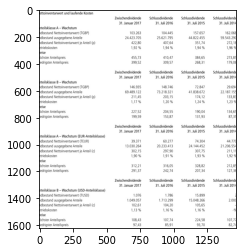

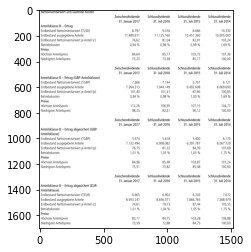

130640595_278775857_2115_2189_65_0.jpg:130640595_278775857_2115_2189_100_0.jpg is 0.9999439577299024


In [83]:
# 直方图计算图片的相似度
for index, img in enumerate(img_list):
    for c_i, c_img in enumerate(img_list[index + 1:]):
        img_file = os.path.join(root_folder, img)
        c_img_file = os.path.join(root_folder, c_img)
        img_hist = get_hist(img_file)
        c_img_hist = get_hist(c_img_file)
        similarity = cv2.compareHist(img_hist, c_img_hist, 0)
        print('{0}:{1} is {2}'.format(img, c_img, similarity))

In [24]:
# 对图片进行统一化处理
def get_thum(image, size=(512, 512), greyscale=False):
    # 利用image对图像大小重新设置, Image.ANTIALIAS为高质量的
    image = image.resize(size, Image.ANTIALIAS)
    if greyscale:
        # 将图片转换为L模式，其为灰度图，其每个像素用8个bit表示
        image = image.convert('L')
    return image

# 计算图片的余弦距离
def image_similarity_vectors(image1_file, image2_file):
    image1 = Image.open(img_file)
    image2 = Image.open(image2_file)
    image1 = get_thum(image1)
    image2 = get_thum(image2)
    images = [image1, image2]
    vectors = []
    norms = []
    for image in images:
        vector = []
        for pixel_tuple in image.getdata():
            vector.append(average(pixel_tuple))
        vectors.append(vector)
        # linalg=linear（线性）+algebra（代数），norm则表示范数
        # 求图片的范数？？
        norms.append(linalg.norm(vector, 2))
    a, b = vectors
    a_norm, b_norm = norms
    # dot返回的是点积，对二维数组（矩阵）进行计算
    res = dot(a / a_norm, b / b_norm)
    return res

206719840_609723357_2817_1873_178_0.jpg:202828800_595260346_3645_2146_384_0.jpg is 0.9947668253104488


In [27]:
for index, img in enumerate(img_list):
    for c_i, c_img in enumerate(img_list[index + 1:]):
        img_file = os.path.join(root_folder, img)
        c_img_file = os.path.join(root_folder, c_img)
        similarity = image_similarity_vectors(img_file, c_img_file)
        print('cosine distance {0}:{1} is {2}'.format(img, c_img, similarity))

cosine distance 117019483_202714967_2410_2408_11_1.jpg:117019483_202714967_2410_2408_11_0.jpg is 0.9892834487872808
cosine distance 117019483_202714967_2410_2408_11_1.jpg:130640595_278775857_2115_2189_145_0.jpg is 0.9801285135615678
cosine distance 117019483_202714967_2410_2408_11_1.jpg:130640595_278775857_2115_2189_128_0.jpg is 0.9797217717494481
cosine distance 117019483_202714967_2410_2408_11_1.jpg:206719840_609723357_2817_1873_120_1.jpg is 0.9782677569242971
cosine distance 117019483_202714967_2410_2408_11_1.jpg:206719840_609723357_2817_1873_120_0.jpg is 0.9786601447947207
cosine distance 117019483_202714967_2410_2408_11_0.jpg:130640595_278775857_2115_2189_145_0.jpg is 0.9800930857004576
cosine distance 117019483_202714967_2410_2408_11_0.jpg:130640595_278775857_2115_2189_128_0.jpg is 0.979586300783512
cosine distance 117019483_202714967_2410_2408_11_0.jpg:206719840_609723357_2817_1873_120_1.jpg is 0.9782577173940735
cosine distance 117019483_202714967_2410_2408_11_0.jpg:206719840_6